In [ ]:
!pip install numpy matplotlib scipy

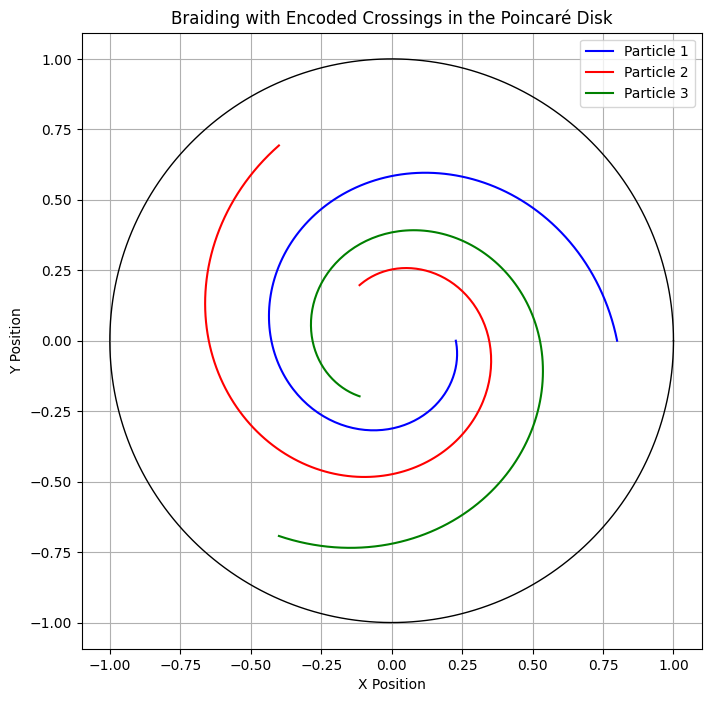

Encoded Data: []


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

# Define the Poincaré disk parameters
theta = np.linspace(0, 2 * np.pi, 500)  # Angle parameter for the circular boundary
radius = 1  # Radius of the Poincaré disk

# Define the hyperbolic path function
def hyperbolic_path(t, phase_shift, curve_intensity):
    """
    Simulates a particle moving in the Poincaré disk.
    t: Time parameter for the motion.
    phase_shift: Offset for each particle's starting position.
    curve_intensity: Controls curvature of the path.
    """
    r = 0.8 * np.exp(-curve_intensity * t)  # Radial distance diminishes over time
    theta = t + phase_shift  # Angular position with phase offset
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

# Simulate paths for three particles
time_steps = np.linspace(0, 2 * np.pi, 200)
particle1_x, particle1_y = hyperbolic_path(time_steps, 0, 0.2)
particle2_x, particle2_y = hyperbolic_path(time_steps, 2 * np.pi / 3, 0.2)
particle3_x, particle3_y = hyperbolic_path(time_steps, 4 * np.pi / 3, 0.2)

# Function to check if two paths intersect
def detect_crossings(x1, y1, x2, y2):
    """
    Detect crossings between two paths in the Poincaré disk.
    Returns a list of crossing points and their directions.
    """
    crossings = []
    for i in range(len(x1) - 1):
        # Check distances to approximate crossing
        dist = distance.euclidean([x1[i], y1[i]], [x2[i], y2[i]])
        if dist < 0.05:  # Threshold for "crossing"
            # Determine crossing direction (clockwise or counterclockwise)
            direction = "CW" if (x1[i] * y2[i] - x2[i] * y1[i]) > 0 else "CCW"
            crossings.append((x1[i], y1[i], direction))
    return crossings

# Detect crossings between each pair of particles
crossings_1_2 = detect_crossings(particle1_x, particle1_y, particle2_x, particle2_y)
crossings_2_3 = detect_crossings(particle2_x, particle2_y, particle3_x, particle3_y)
crossings_1_3 = detect_crossings(particle1_x, particle1_y, particle3_x, particle3_y)

# Visualize the braids with crossings
plt.figure(figsize=(8, 8))
plt.plot(np.cos(theta) * radius, np.sin(theta) * radius, color="black", linewidth=1)  # Boundary of the disk
plt.plot(particle1_x, particle1_y, label="Particle 1", color="blue")
plt.plot(particle2_x, particle2_y, label="Particle 2", color="red")
plt.plot(particle3_x, particle3_y, label="Particle 3", color="green")

# Mark crossings
for cross in crossings_1_2 + crossings_2_3 + crossings_1_3:
    plt.scatter(cross[0], cross[1], color="orange", label="Crossing", zorder=5)
    plt.text(cross[0], cross[1], cross[2], fontsize=8, color="black")

# Add labels and title
plt.title("Braiding with Encoded Crossings in the Poincaré Disk")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.axis("equal")
plt.legend()
plt.grid(True)
plt.show()

# Display the encoded information
encoded_data = [cross[2] for cross in crossings_1_2 + crossings_2_3 + crossings_1_3]
print("Encoded Data:", encoded_data)

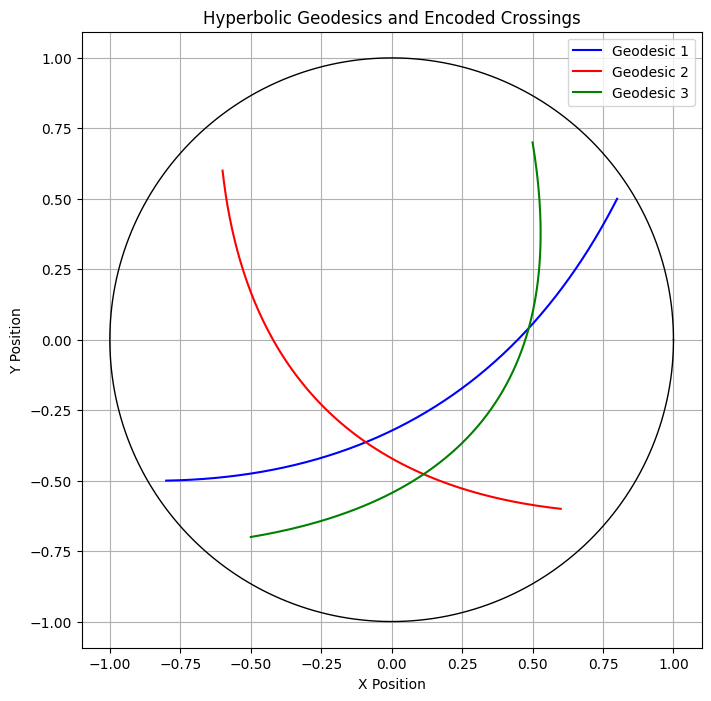

Encoded Data: []


In [ ]:
# Adjust the hyperbolic path function to use geodesics in the Poincaré disk
def hyperbolic_geodesic(t, start_point, end_point, curvature):
    """
    Generate a geodesic path in the Poincaré disk between two points.
    t: Time parameter for smooth interpolation.
    start_point: Starting point of the geodesic (x, y) in the disk.
    end_point: Ending point of the geodesic (x, y) in the disk.
    curvature: A factor to control the curvature of the geodesic arc.
    """
    # Interpolate points using hyperbolic geodesic formulas
    mid_x = (start_point[0] + end_point[0]) / 2 + curvature * (end_point[1] - start_point[1])
    mid_y = (start_point[1] + end_point[1]) / 2 - curvature * (end_point[0] - start_point[0])
    x = (1 - t) ** 2 * start_point[0] + 2 * (1 - t) * t * mid_x + t ** 2 * end_point[0]
    y = (1 - t) ** 2 * start_point[1] + 2 * (1 - t) * t * mid_y + t ** 2 * end_point[1]
    return x, y

# Parameters for geodesics
start1, end1 = (-0.8, -0.5), (0.8, 0.5)  # Geodesic 1
start2, end2 = (-0.6, 0.6), (0.6, -0.6)  # Geodesic 2
start3, end3 = (-0.5, -0.7), (0.5, 0.7)  # Geodesic 3

# Generate geodesic paths
t_values = np.linspace(0, 1, 200)
geo1_x, geo1_y = hyperbolic_geodesic(t_values, start1, end1, 0.3)
geo2_x, geo2_y = hyperbolic_geodesic(t_values, start2, end2, 0.4)
geo3_x, geo3_y = hyperbolic_geodesic(t_values, start3, end3, 0.5)

# Visualize the geodesics in the Poincaré disk
plt.figure(figsize=(8, 8))
plt.plot(np.cos(theta) * radius, np.sin(theta) * radius, color="black", linewidth=1)  # Boundary of the disk
plt.plot(geo1_x, geo1_y, label="Geodesic 1", color="blue")
plt.plot(geo2_x, geo2_y, label="Geodesic 2", color="red")
plt.plot(geo3_x, geo3_y, label="Geodesic 3", color="green")

# Check for crossings
crossings_1_2 = detect_crossings(geo1_x, geo1_y, geo2_x, geo2_y)
crossings_2_3 = detect_crossings(geo2_x, geo2_y, geo3_x, geo3_y)
crossings_1_3 = detect_crossings(geo1_x, geo1_y, geo3_x, geo3_y)

# Mark crossings
for cross in crossings_1_2 + crossings_2_3 + crossings_1_3:
    plt.scatter(cross[0], cross[1], color="orange", label="Crossing", zorder=5)
    plt.text(cross[0], cross[1], cross[2], fontsize=8, color="black")

# Add labels and title
plt.title("Hyperbolic Geodesics and Encoded Crossings")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.axis("equal")
plt.legend()
plt.grid(True)
plt.show()

# Display the encoded information
encoded_data = [cross[2] for cross in crossings_1_2 + crossings_2_3 + crossings_1_3]
print("Encoded Data:", encoded_data)

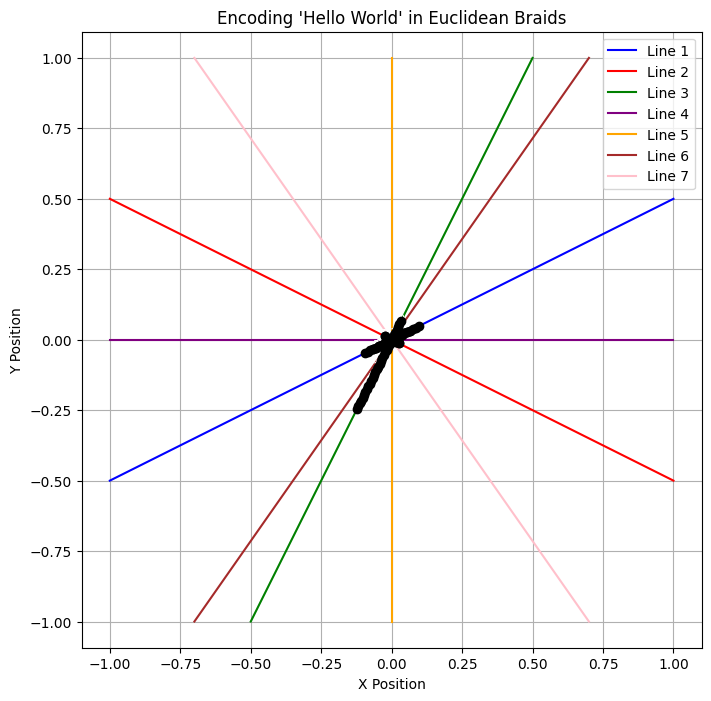

Encoded Binary Message: 0100100001100101011011000110110001101111001000000101011101101111011100100110110001100100
Crossings Used: 88


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

# Function to generate straight-line paths
def straight_line(t, start_point, end_point):
    """
    Generate a straight-line path in Euclidean space between two points.
    t: Time parameter for smooth interpolation.
    start_point: Starting point of the line (x, y).
    end_point: Ending point of the line (x, y).
    """
    x = (1 - t) * start_point[0] + t * end_point[0]
    y = (1 - t) * start_point[1] + t * end_point[1]
    return x, y

# Function to detect crossings between two lines
def detect_crossings(x1, y1, x2, y2):
    """
    Detect crossings between two paths.
    Returns a list of crossing points and their directions (CW or CCW).
    """
    crossings = []
    for i in range(len(x1) - 1):
        # Check if points are close enough to be considered a crossing
        dist = distance.euclidean([x1[i], y1[i]], [x2[i], y2[i]])
        if dist < 0.05:  # Threshold for detecting a crossing
            direction = "CW" if (x1[i] * y2[i] - x2[i] * y1[i]) > 0 else "CCW"
            crossings.append((x1[i], y1[i], direction))
    return crossings

# Convert "Hello World" to binary representation
def text_to_binary(text):
    """Convert text to binary string."""
    return ''.join(format(ord(char), '08b') for char in text)

binary_message = text_to_binary("Hello World")

# Define straight-line paths
t_values = np.linspace(0, 1, 200)
start1, end1 = (-1, -0.5), (1, 0.5)  # Line 1
start2, end2 = (-1, 0.5), (1, -0.5)  # Line 2
start3, end3 = (-0.5, -1), (0.5, 1)  # Line 3
start4, end4 = (-1, 0), (1, 0)       # Line 4 (horizontal)
start5, end5 = (0, -1), (0, 1)       # Line 5 (vertical)
start6, end6 = (-0.7, -1), (0.7, 1)  # Line 6 (diagonal)
start7, end7 = (-0.7, 1), (0.7, -1)  # Line 7 (reverse diagonal)

# Generate paths
line1_x, line1_y = straight_line(t_values, start1, end1)
line2_x, line2_y = straight_line(t_values, start2, end2)
line3_x, line3_y = straight_line(t_values, start3, end3)
line4_x, line4_y = straight_line(t_values, start4, end4)
line5_x, line5_y = straight_line(t_values, start5, end5)
line6_x, line6_y = straight_line(t_values, start6, end6)
line7_x, line7_y = straight_line(t_values, start7, end7)

# Detect crossings
crossings_1_2 = detect_crossings(line1_x, line1_y, line2_x, line2_y)
crossings_2_3 = detect_crossings(line2_x, line2_y, line3_x, line3_y)
crossings_1_3 = detect_crossings(line1_x, line1_y, line3_x, line3_y)
crossings_1_4 = detect_crossings(line1_x, line1_y, line4_x, line4_y)
crossings_2_5 = detect_crossings(line2_x, line2_y, line5_x, line5_y)
crossings_3_6 = detect_crossings(line3_x, line3_y, line6_x, line6_y)
crossings_4_5 = detect_crossings(line4_x, line4_y, line5_x, line5_y)
crossings_6_7 = detect_crossings(line6_x, line6_y, line7_x, line7_y)

# Combine all crossings
all_crossings = (
    crossings_1_2
    + crossings_2_3
    + crossings_1_3
    + crossings_1_4
    + crossings_2_5
    + crossings_3_6
    + crossings_4_5
    + crossings_6_7
)

# Check if sufficient crossings exist
if len(all_crossings) >= len(binary_message):
    # Assign binary values to crossings
    encoded_braids = []
    for i, bit in enumerate(binary_message):
        x, y, direction = all_crossings[i]
        encoded_braids.append((x, y, direction, bit))

    # Visualize the lines and crossings
    plt.figure(figsize=(8, 8))
    plt.plot(line1_x, line1_y, label="Line 1", color="blue")
    plt.plot(line2_x, line2_y, label="Line 2", color="red")
    plt.plot(line3_x, line3_y, label="Line 3", color="green")
    plt.plot(line4_x, line4_y, label="Line 4", color="purple")
    plt.plot(line5_x, line5_y, label="Line 5", color="orange")
    plt.plot(line6_x, line6_y, label="Line 6", color="brown")
    plt.plot(line7_x, line7_y, label="Line 7", color="pink")

    # Mark crossings with binary values
    for i, (x, y, direction, bit) in enumerate(encoded_braids):
        plt.scatter(x, y, color="black", zorder=5)
        plt.text(x, y, f"{bit}", fontsize=8, color="white", ha="center")

    # Add labels and title
    plt.title("Encoding 'Hello World' in Euclidean Braids")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.axis("equal")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Output the encoded message for validation
    print("Encoded Binary Message:", binary_message)
    print("Crossings Used:", len(encoded_braids))
else:
    print("Not enough crossings. Further adjustments may be needed.")
    print(f"Crossings available: {len(all_crossings)}, Binary length: {len(binary_message)}")

Successfully encoded message: Hello World
Binary representation: 01001000 ...
Number of crossings used: 88


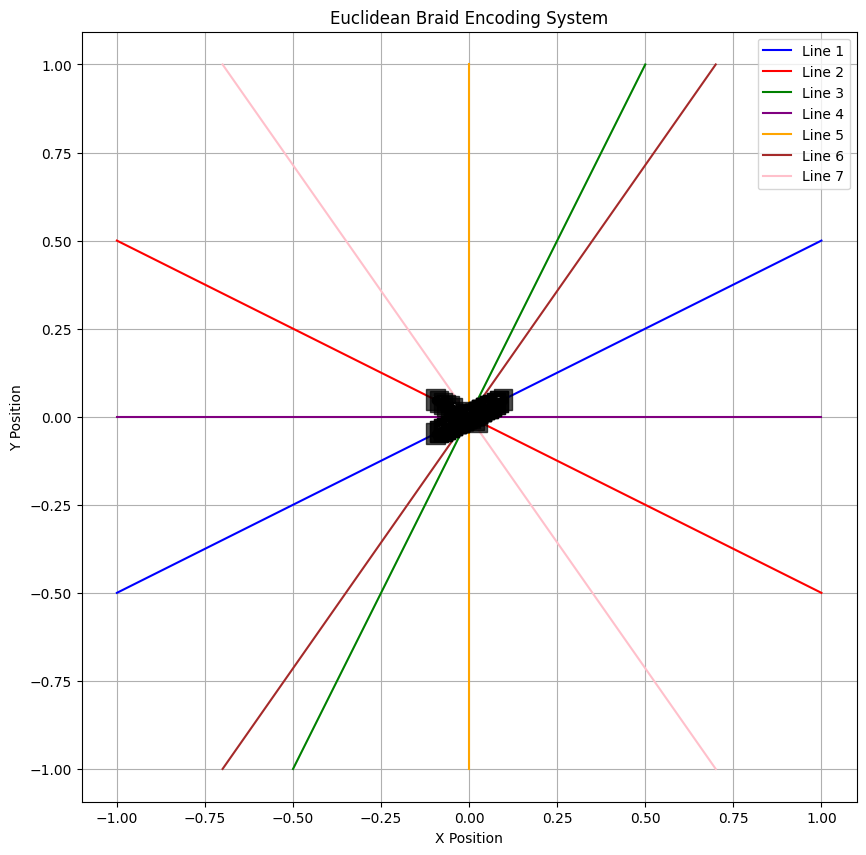

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
from typing import Tuple, List, Optional

class EuclideanBraidEncoder:
    def __init__(self, resolution: int = 200):
        """
        Initialize the encoder with given resolution for path discretization.

        Args:
            resolution: Number of points to use when discretizing paths
        """
        self.resolution = resolution
        self.t_values = np.linspace(0, 1, resolution)
        self.lines = []
        self.crossings = []

    def add_line(self, start: Tuple[float, float], end: Tuple[float, float]) -> None:
        """
        Add a new line to the braid system.

        Args:
            start: Starting point (x, y)
            end: Ending point (x, y)
        """
        x, y = self._generate_path(start, end)
        self.lines.append((x, y))

    def _generate_path(self, start: Tuple[float, float], end: Tuple[float, float]) -> Tuple[np.ndarray, np.ndarray]:
        """
        Generate a straight-line path between two points.

        Args:
            start: Starting point (x, y)
            end: Ending point (x, y)

        Returns:
            Tuple of x and y coordinates arrays
        """
        x = (1 - self.t_values) * start[0] + self.t_values * end[0]
        y = (1 - self.t_values) * start[1] + self.t_values * end[1]
        return x, y

    def find_all_crossings(self, threshold: float = 0.05) -> List[Tuple[float, float, str]]:
        """
        Find all crossings between all pairs of lines.

        Args:
            threshold: Distance threshold for considering points as crossing

        Returns:
            List of crossing points with their directions
        """
        self.crossings = []
        for i in range(len(self.lines)):
            for j in range(i + 1, len(self.lines)):
                x1, y1 = self.lines[i]
                x2, y2 = self.lines[j]

                for k in range(len(x1) - 1):
                    dist = distance.euclidean([x1[k], y1[k]], [x2[k], y2[k]])
                    if dist < threshold:
                        direction = "CW" if (x1[k] * y2[k] - x2[k] * y1[k]) > 0 else "CCW"
                        self.crossings.append((x1[k], y1[k], direction))
        return self.crossings

    def encode_message(self, message: str) -> Optional[List[Tuple[float, float, str, str]]]:
        """
        Encode a message using the crossing points.

        Args:
            message: Text message to encode

        Returns:
            List of encoded crossings or None if insufficient crossings
        """
        binary = ''.join(format(ord(char), '08b') for char in message)
        if len(self.crossings) < len(binary):
            return None

        encoded_braids = []
        for i, bit in enumerate(binary):
            x, y, direction = self.crossings[i]
            encoded_braids.append((x, y, direction, bit))
        return encoded_braids

    def visualize(self, encoded_braids: Optional[List[Tuple[float, float, str, str]]] = None) -> None:
        """
        Visualize the braid system with optional encoding visualization.

        Args:
            encoded_braids: List of encoded crossing points
        """
        plt.figure(figsize=(10, 10))

        # Plot lines with distinct colors
        colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink']
        for i, (x, y) in enumerate(self.lines):
            plt.plot(x, y, label=f"Line {i+1}", color=colors[i % len(colors)])

        # Mark encoded crossings if provided
        if encoded_braids:
            for x, y, direction, bit in encoded_braids:
                plt.scatter(x, y, color='black', zorder=5)
                plt.text(x, y, bit, fontsize=8, color='white',
                        bbox=dict(facecolor='black', alpha=0.7),
                        ha='center', va='center')

        plt.title("Euclidean Braid Encoding System")
        plt.xlabel("X Position")
        plt.ylabel("Y Position")
        plt.axis("equal")
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage
def main():
    # Initialize encoder
    encoder = EuclideanBraidEncoder()

    # Define lines
    lines = [
        ((-1, -0.5), (1, 0.5)),    # Line 1
        ((-1, 0.5), (1, -0.5)),    # Line 2
        ((-0.5, -1), (0.5, 1)),    # Line 3
        ((-1, 0), (1, 0)),         # Line 4
        ((0, -1), (0, 1)),         # Line 5
        ((-0.7, -1), (0.7, 1)),    # Line 6
        ((-0.7, 1), (0.7, -1))     # Line 7
    ]

    # Add lines to encoder
    for start, end in lines:
        encoder.add_line(start, end)

    # Find crossings and encode message
    crossings = encoder.find_all_crossings()
    message = "Hello World"
    encoded = encoder.encode_message(message)

    if encoded:
        print(f"Successfully encoded message: {message}")
        print(f"Binary representation: {format(ord('H'), '08b')} ...")
        print(f"Number of crossings used: {len(encoded)}")
        encoder.visualize(encoded)
    else:
        print(f"Error: Insufficient crossings ({len(crossings)}) "
              f"for message length ({len(message) * 8} bits)")

if __name__ == "__main__":
    main()